In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Parte 1.

In [3]:
!ls '/content/drive/MyDrive/Homework3_Astroinformatica/'

'Copia de X_test_nlevels5.npy'	 'Copia de y_train_nlevels5.npy'
'Copia de X_train_nlevels5.npy'   Homework3_Astroinformatica.ipynb
'Copia de y_test_nlevels5.npy'


In [4]:
import numpy as np

data_path = '/content/drive/MyDrive/Homework3_Astroinformatica/'  # Ruta a la carpeta que contiene los archivos .npy

# Carga de archivos .npy
X_test = np.load(data_path + 'Copia de X_test_nlevels5.npy')
X_train = np.load(data_path + 'Copia de X_train_nlevels5.npy')
y_test = np.load(data_path + 'Copia de y_test_nlevels5.npy')
y_train = np.load(data_path + 'Copia de y_train_nlevels5.npy')

In [5]:
#Parte 2

In [6]:
#Si se supone que el arreglo X_test y el arreglo X_train contienen varias
#imágenes, entonces lo que debemos hacer es eliminar las imágenes que contengan
#valores NaN, o bien, eliminar de dichas imágenes aquellas columnas o filas que
#contengan valores NaN. Para ello además, lo que queremos es obtener el número
#de imágenes que se eliminan, como el índice de cada una de ellas, o bien ir
#eliminando las filas y columnas y devolviendo sus índices. Pero parece ser el
#caso que, primero queremos comparar el largo de el X_test con el largo de todos
#los demás arreglos, para ver si tiene sentido o no lo que queremos hacer. No solo
#eso sino también el tipo de objeto y como se ve:
print(len(X_test), len(X_train), len(y_test), len(y_train))
print(type(X_test), type(X_train), type(y_test), type(y_train))

4784 9605 4784 9605
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
import numpy as np

# Supongamos que tienes un arreglo de 10 matrices llamado 'arreglo_matrices'

# Crear una lista para almacenar los índices de las matrices a eliminar
def eliminar_NaN_o_nula(X, Y):
  indices_eliminar = []
  arreglo_matrices = X
  arreglo_vectores_desplazamiento = Y
  # Iterar sobre las matrices del arreglo
  for i, matriz in enumerate(arreglo_matrices):
      # Verificar si alguna submatriz contiene elementos NaN
      if np.isnan(matriz).any():
          indices_eliminar.append(i)
          continue

      # Verificar si alguna submatriz es completamente nula
      for submatriz in matriz:
          if np.all(submatriz == 0):
              indices_eliminar.append(i)
              break

  # Eliminar las matrices del arreglo
  arreglo_matrices = np.delete(arreglo_matrices, indices_eliminar, axis=0)
  arreglo_vectores_desplazamiento = np.delete(arreglo_vectores_desplazamiento,
                                              indices_eliminar, axis=0)
  return arreglo_matrices, arreglo_vectores_desplazamiento

nuevo_X_train, nuevo_y_train = eliminar_NaN_o_nula(X_train, y_train)
nuevo_X_test, nuevo_y_test = eliminar_NaN_o_nula(X_test, y_test)

In [10]:
#Ahora bien, qué significa normalizar las imágenes entre 0 y 1?, no significa
#acaso que cada numero de las submatrices los dividimos por la suma de todos
#los numeros de la submatriz dada?, o bien significa que para cada imagen, para
#un mismo objeto, desde la mas grande a la mas pequeña, normalizamos segun la
#propia imagen grande o pequeña. Porque qué sentido tendría normalizar la imagen
#más pequeña conforme a la suma total de la imagen más grande, o viceversa?
#De manera que, esto eventualmente nos puede servir para poder ver más o menos
#como se distribuye la poblacion.
#Este paso es más facil, por ende podemos decir que para una sola submatriz
#print(nuevo_X_test[0][0])
for i in range(len(nuevo_X_test)):
  I = nuevo_X_test[i]
  for j in range(len(I)):
    J = I[j]
    suma_j = np.sum(J)
    J = J/suma_j
    nuevo_X_test[i][j] = J
#comprobamos para la primera submatriz, que estpa normalizada.
#print(nuevo_X_test[0][0])

In [11]:
#Ahora hacemos lo mismo pero para el nuevo_X_train
#print(nuevo_X_train[0][0])
for i in range(len(nuevo_X_train)):
  I = nuevo_X_train[i]
  for j in range(len(I)):
    J = I[j]
    suma_j = np.sum(J)
    J = J/suma_j
    nuevo_X_train[i][j] = J
#comprobamos para la primera submatriz, que esta normalizada.
#print(nuevo_X_train[0][0])


30
está dentro del FOV


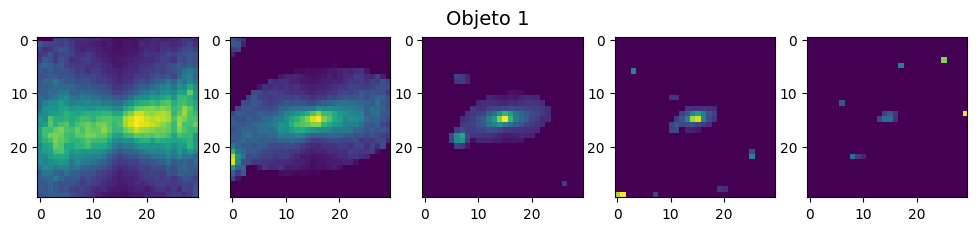

30
está dentro del FOV


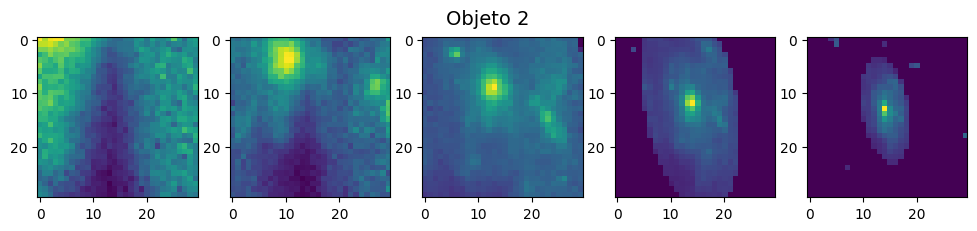

30
está dentro del FOV


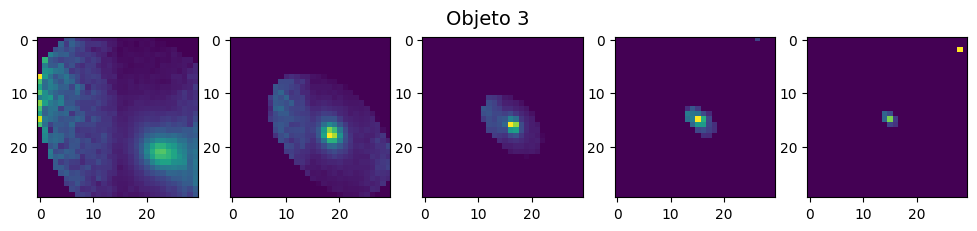

30
está dentro del FOV


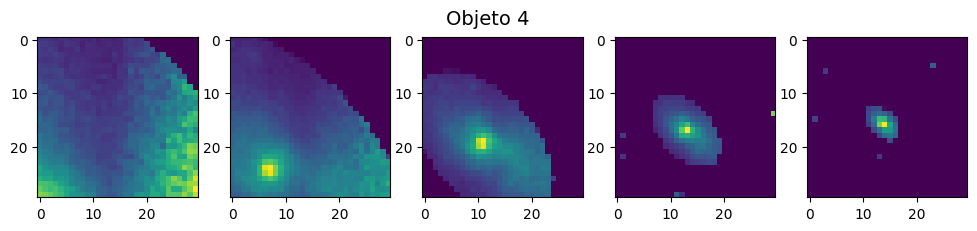

30
está dentro del FOV


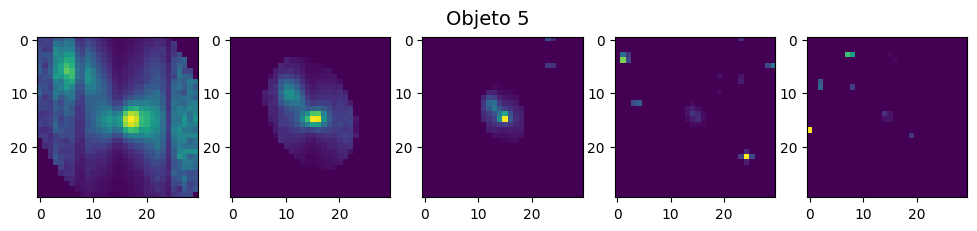

30
está dentro del FOV


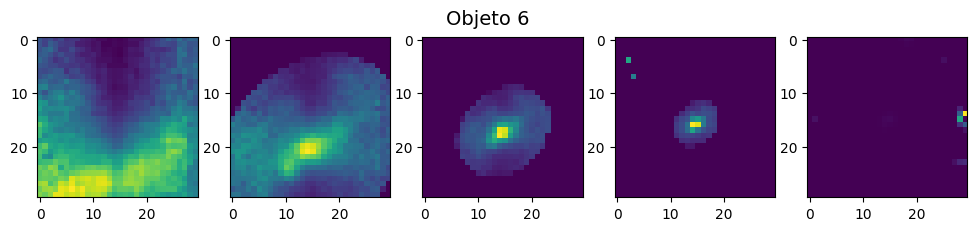

30
está dentro del FOV


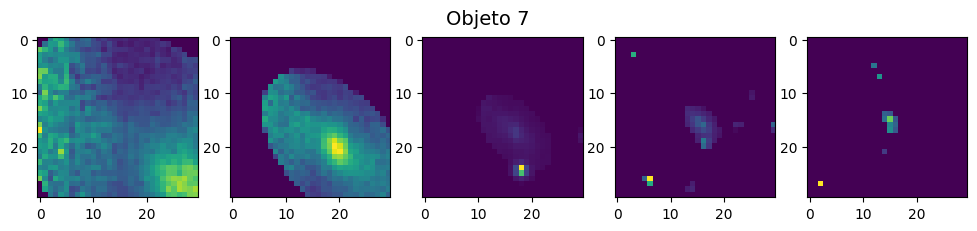

30
está dentro del FOV


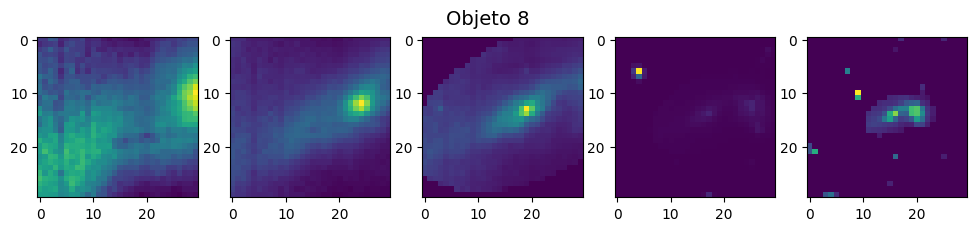

30
está dentro del FOV


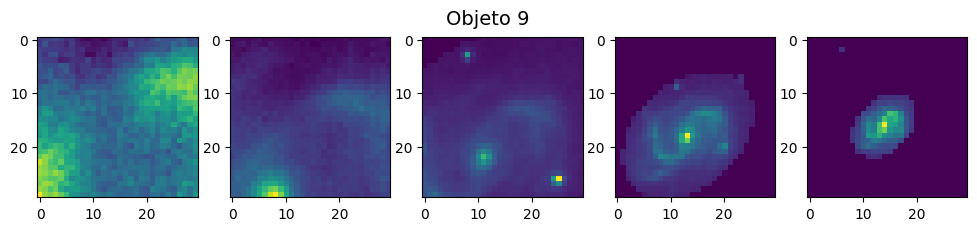

30
está dentro del FOV


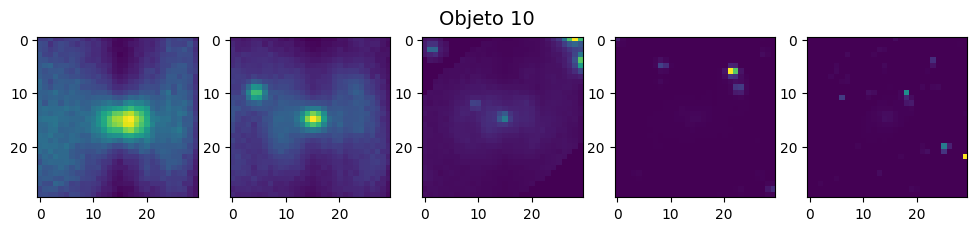

0


In [44]:
import matplotlib.pyplot as plt
O = 10#len(nuevo_X_test)
fuera_FOV = 0
for a in range(O):
  matrices = nuevo_X_test[a]
  longitud_columna = matrices[0].shape[0]
  print(longitud_columna)
  #ahora hago la matriz en la cual iré poniendo las columnas,
  #que debe ser del largo de la cantidad de matrices de la nuevo_X_test[i]
  nueva_matriz = np.empty((longitud_columna, len(matrices)))
  u = len(matrices[0][0])
  fig, axs = plt.subplots(1, u, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})
  fig.suptitle('Objeto '+str(a+1), fontsize=14, y=0.75)
  x_vector = y_test[a][0]
  y_vector = y_test[a][1]
  for j in range(u):
    p = 2**(j-1)
    x = (x_vector)/p
    y = (y_vector)/p
    for i, matriz in enumerate(matrices):
        primera_columna = matriz[:, j]
        nueva_matriz[:, i] = primera_columna
    x_coord = int((len(nueva_matriz[:,0]))/2)
    y_coord = int((len(nueva_matriz[0]))/2)
    im = axs[j].imshow(nueva_matriz)
    #axs[j].arrow(x_coord, y_coord, x, y, width=0.3, color='red')
  prop = 2**(4)
  xx, yy = x_vector/prop, y_vector/prop
  if not(xx < 1) and not(yy < 1):
    fuera_FOV += 1
    print('no está en el FOV')
  else:
    print('está dentro del FOV')
  plt.subplots_adjust(top=0.85, wspace=0.2)
  plt.show()
print(fuera_FOV)

In [45]:
def fuera_FOV(X,Y):
  O = len(X)
  fuera_FOV = 0
  for a in range(O):
    #ahora hago la matriz en la cual iré poniendo las columnas,
    #que debe ser del largo de la cantidad de matrices de la nuevo_X_test[i]
    x_vector = Y[a][0]
    y_vector = Y[a][1]
    prop = 2**(4)
    xx, yy = x_vector/prop, y_vector/prop
    if not(xx < 1) and not(yy < 1):
      fuera_FOV += 1
  return fuera_FOV
print('Hay',
      fuera_FOV(nuevo_X_train, nuevo_y_train),
      'vectores de desplazamiento del train set que están fuera del campo de visión mas grande de su respectiva imagen')
print('Hay',
      fuera_FOV(nuevo_X_test, nuevo_y_test),
      'vectores de desplazamiento del test set que están fuera del campo de visión mas grande de su respectiva imagen')

Hay 254 vectores de desplazamiento del train set que están fuera del campo de visión mas grande de su respectiva imagen
Hay 120 vectores de desplazamiento del test set que están fuera del campo de visión mas grande de su respectiva imagen


In [15]:
def X_Y_limpios(X,Y):
  def limpiar_X_Y(x,y):
    O = len(x)
    indices = []
    for a in range(O):
      x_vector = y[a][0]
      y_vector = y[a][1]
      prop = 2**(4)
      xx, yy = x_vector/prop, y_vector/prop
      if not(xx < 1) and not(yy < 1):
        indices += [a]
    return indices

  indices_a_eliminar = limpiar_X_Y(X, Y)

  vectores = Y
  mascara = np.ones(len(vectores), dtype=bool)
  mascara[list(indices_a_eliminar)] = False
  arreglo = X

  vectores_filtrados = vectores[mascara]
  X_test_filtrado = [lista for indice, lista in enumerate(arreglo) if indice not in indices_a_eliminar]
  print(len(Y),len(vectores_filtrados))
  print(len(X), len(X_test_filtrado))
  return X_test_filtrado, vectores_filtrados

X_test_nuevo, y_test_nuevo = X_Y_limpios(nuevo_X_test, nuevo_y_test)
X_train_nuevo, y_train_nuevo = X_Y_limpios(nuevo_X_train, nuevo_y_train)

2991 2871
2991 2871
5928 5674
5928 5674


In [16]:
print(len(y_train_nuevo), len(X_train_nuevo))

5674 5674


In [46]:
#Parte 3

In [17]:
#comprobamos si las matrices están normalizadas
def comprobar_suma(matriz):
    suma = np.sum(matriz)
    if suma == 1:
        return True
    else:
        return False

# Ejemplo de matriz que suma 1
matriz1 = X_test_nuevo[0][0]
print(comprobar_suma(matriz1))

True


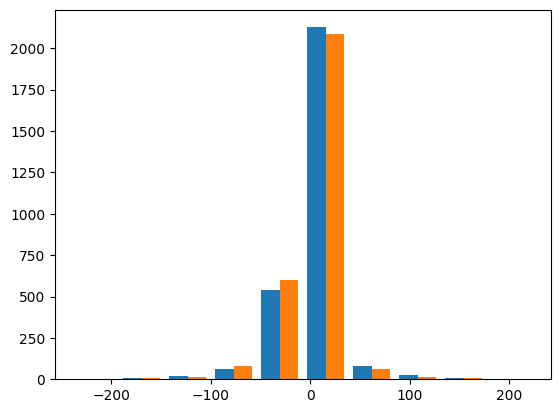

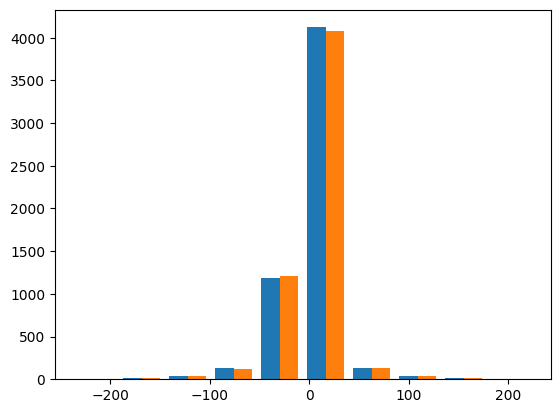

In [18]:
import matplotlib.pyplot as plt

vectores = y_test_nuevo
vectores1 = y_train_nuevo
def histograma(displacement_vectors):
  plt.hist(displacement_vectors, bins=10)
  plt.show()

histograma(vectores)
histograma(vectores1)


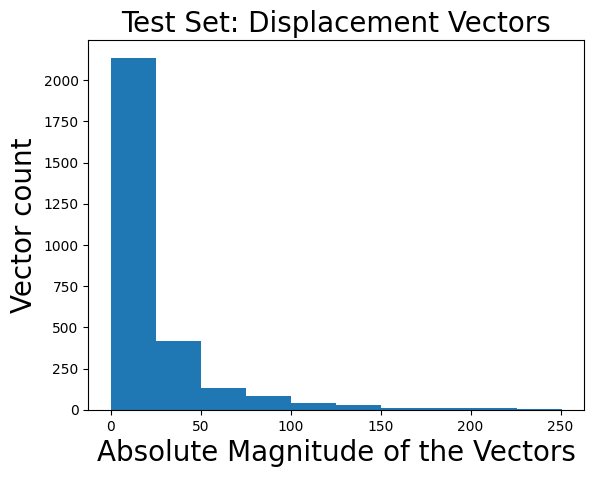

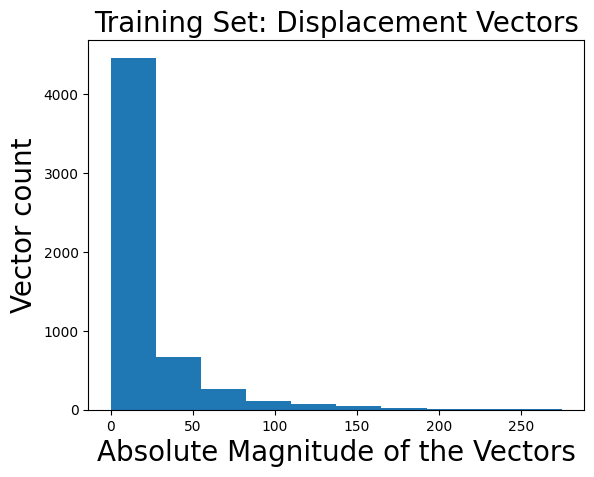

In [19]:
def hist_abs(displacement_vectors, string_displ):
  modulos = np.linalg.norm(displacement_vectors, axis=1)
  plt.hist(modulos, bins=10)
  plt.title(str(string_displ)+': Displacement Vectors', fontsize = 20)
  plt.ylabel('Vector count',  fontsize = 20)
  plt.xlabel('Absolute Magnitude of the Vectors', fontsize = 20)
  plt.show()

hist_abs(y_test_nuevo, 'Test Set')
hist_abs(y_train_nuevo, 'Training Set')

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

vectores = y_test_nuevo

modulos = np.linalg.norm(vectores, axis=1)

hist, bins, _ = plt.hist(modulos, bins=10)
elementos_aleatorios = []
indices1 = []
#lo que haré a continuacion es elegir al azar un vector y por ende una imagen correspondiente
#para cada uno de esos 10 vectores por bin.
for bin_index in range(len(bins)-1):
    frecuencia_bin = hist[bin_index]
    # fijo la misma semilla fija antes de generar cada número aleatorio
    np.random.seed(123)
    # ahora un número aleatorio en el rango de frecuencia del bin
    aleatorio = np.random.randint(frecuencia_bin-1)
    # Obtengo los índices de los elementos en el bin
    indices_bin = np.where((modulos >= bins[bin_index]) & (modulos < bins[bin_index + 1]))[0]
    # Obtener un índice aleatorio del bin
    indice_aleatorio = indices_bin[aleatorio]
    indices1 += [indice_aleatorio]
    elementos_aleatorios.append(vectores[indice_aleatorio])
elementos_aleatorios = np.array(elementos_aleatorios)
plt.close()

                                             imagenes X_test, y_test: 


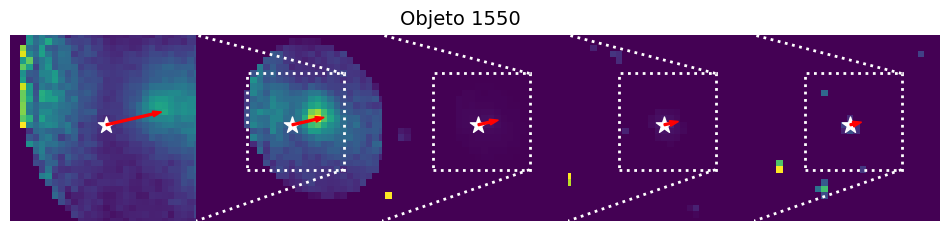

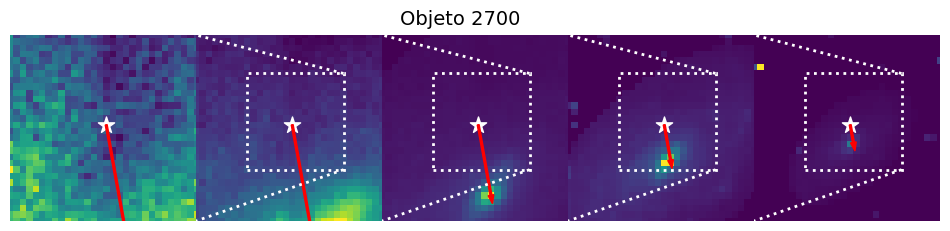

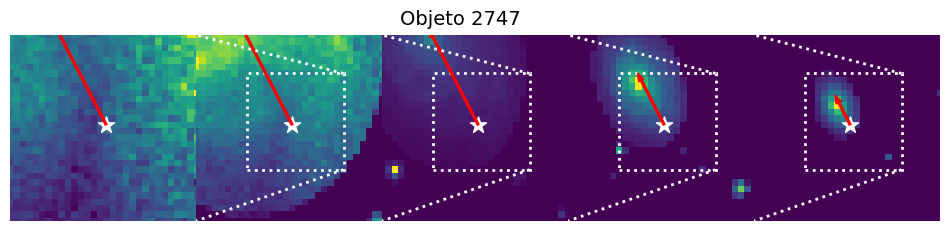

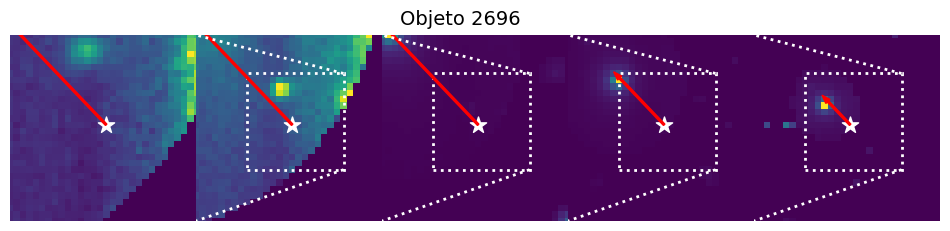

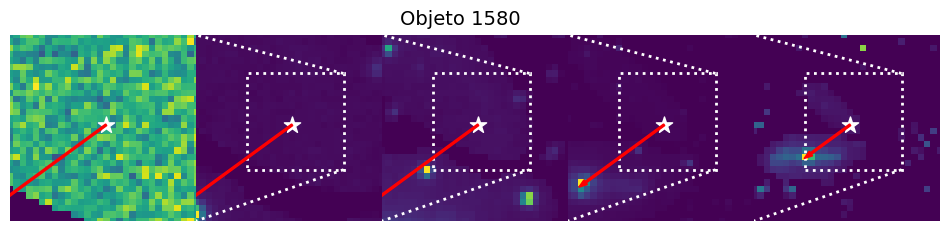

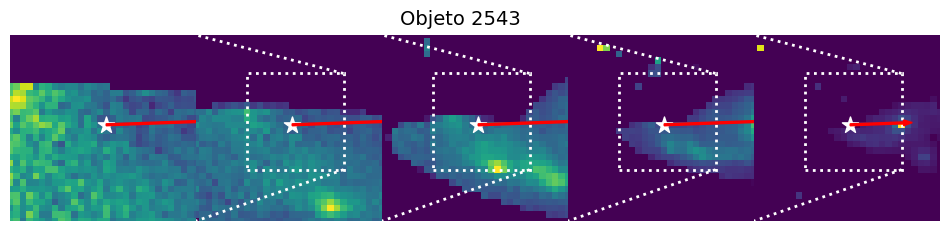

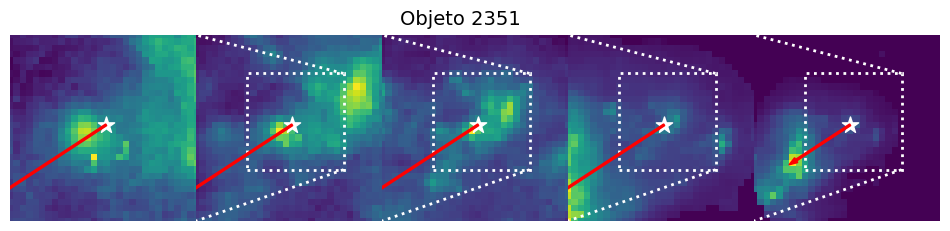

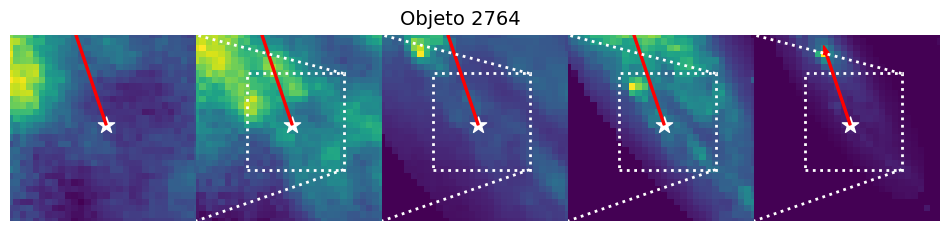

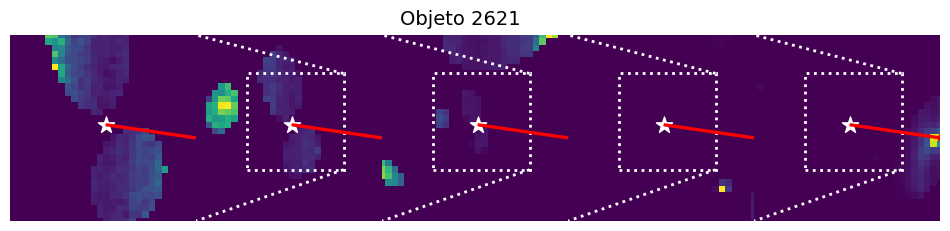

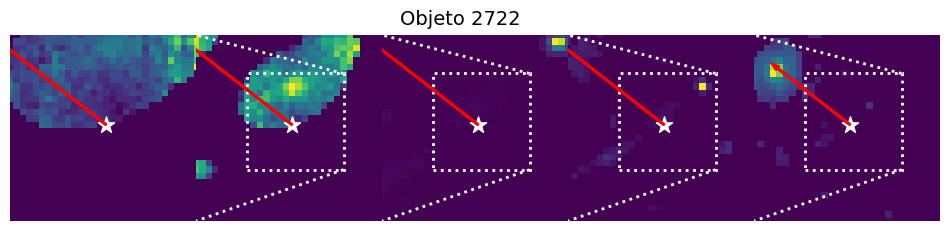

                                           imagenes X_train, y_train: 


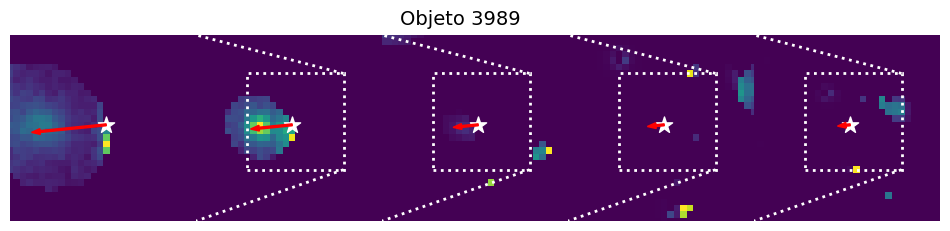

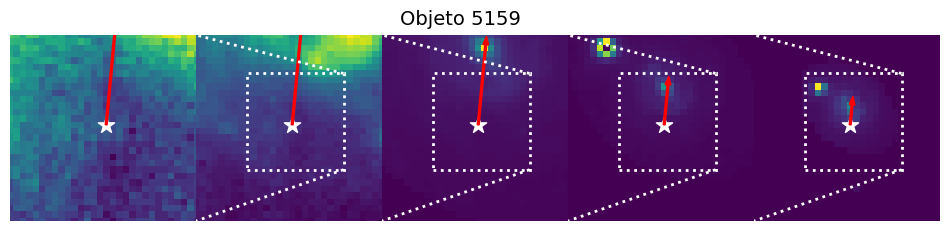

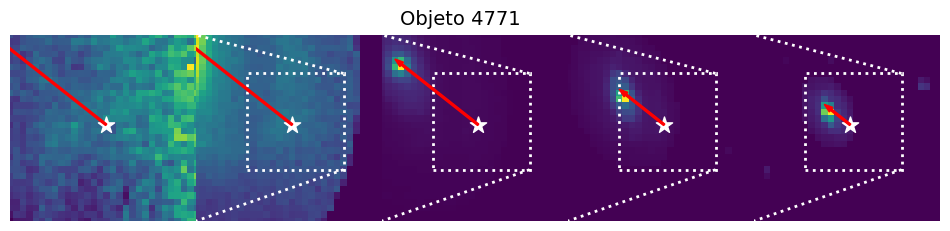

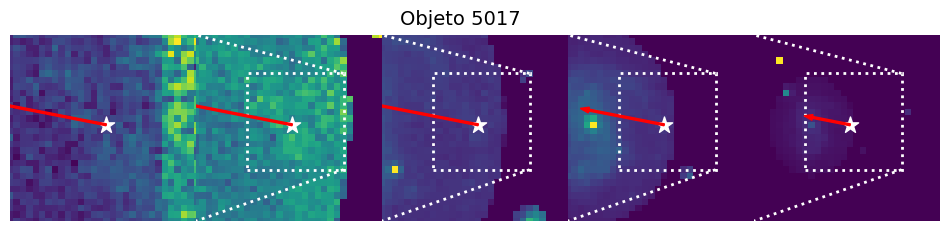

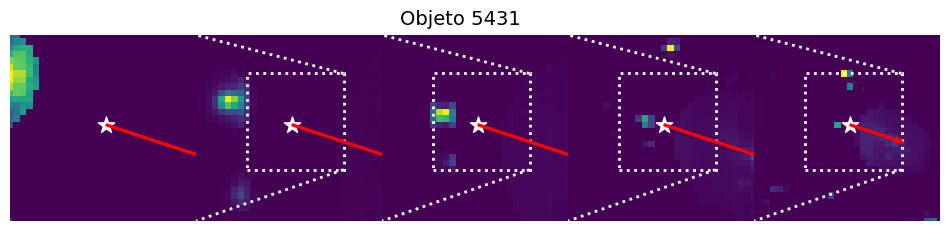

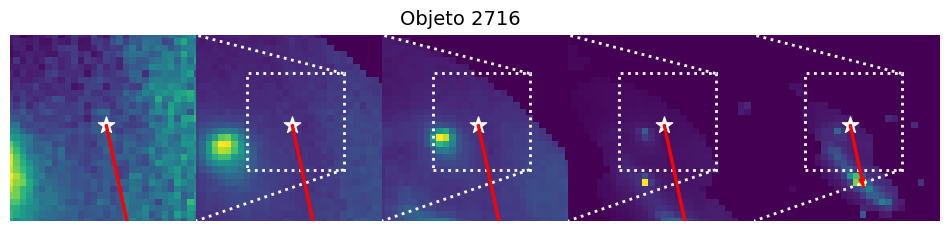

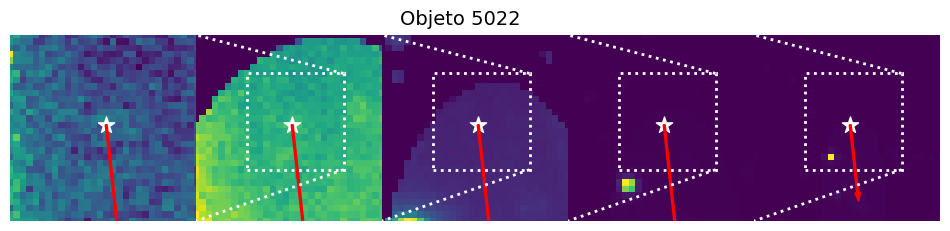

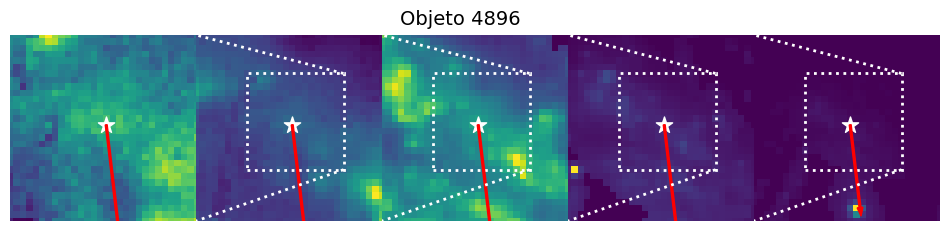

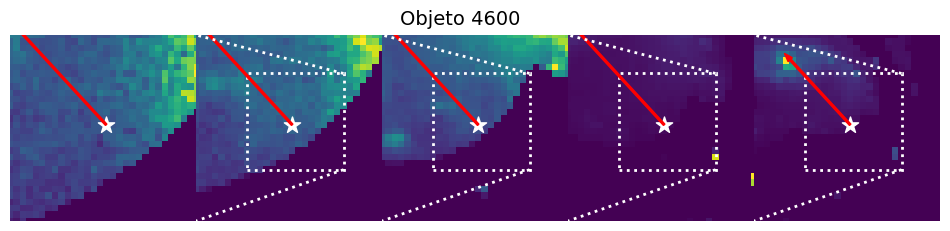

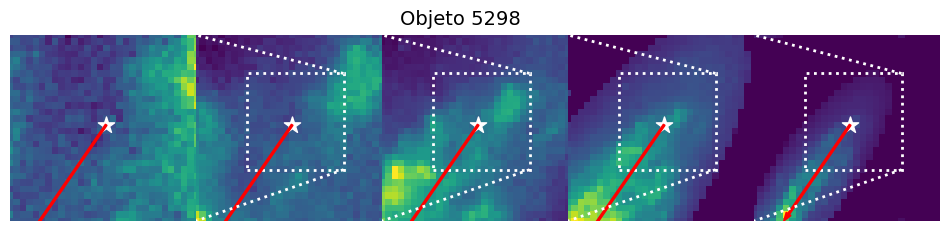

In [38]:
import matplotlib.patches as patches

guardar_matrices = []
def imagenes_10_bin(XX, YY):
  np.random.seed(123)
  vectores = YY
  modulos = np.linalg.norm(vectores, axis=1)
  hist, bins, _ = plt.hist(modulos, bins=10)
  elementos_aleatorios = []
  indices1 = []
  #lo que haré a continuacion es elegir al azar un vector y por ende una imagen correspondiente
  #para cada uno de esos 10 vectores por bin.
  for bin_index in range(len(bins)-1):
      frecuencia_bin = hist[bin_index]
      # fijo la misma semilla fija antes de generar cada número aleatorio
      np.random.seed(123)
      # ahora un número aleatorio en el rango de frecuencia del bin
      aleatorio = np.random.randint(frecuencia_bin-1)
      # Obtengo los índices de los elementos en el bin
      indices_bin = np.where((modulos >= bins[bin_index]) & (modulos < bins[bin_index + 1]))[0]
      # Obtener un índice aleatorio del bin
      indice_aleatorio = indices_bin[aleatorio]
      indices1 += [indice_aleatorio]
      elementos_aleatorios.append(vectores[indice_aleatorio])
  elementos_aleatorios = np.array(elementos_aleatorios)
  plt.close()
  fuera_FOV = 0
  for a in indices1:
    matrices = XX[a]
    longitud_columna = matrices[0].shape[0]
    nueva_matriz = np.empty((longitud_columna, len(matrices)))
    u = len(matrices[0][0])
    fig, axs = plt.subplots(1, u, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})
    fig.suptitle('Objeto '+str(a+1), fontsize=14, y=0.75)
    x_vector = YY[a][0]
    y_vector = YY[a][1]
    for j in range(u):
      p = 2**(j)
      x = (x_vector)/p
      y = (y_vector)/p
      for i, matriz in enumerate(matrices):
          primera_columna = matriz[:, j]
          nueva_matriz[:, i] = primera_columna
      x_coord = int((len(nueva_matriz[0]))/2)
      y_coord = int((len(nueva_matriz[:,0]))/2)
      im = axs[j].imshow(nueva_matriz, cmap='viridis')
      centro = x_coord, y_coord
      largo = int(len(nueva_matriz)/2)
      ancho = int(len(nueva_matriz)/2)
      if j>0:
        esquina_inferior_izquierda = centro - np.array([int(largo / 2), int(ancho / 2)])
        esquina_superior_derecha = centro + np.array([int(largo / 2), int(ancho / 2)])
        rect = patches.Rectangle(esquina_inferior_izquierda, largo,
                                ancho, linewidth=2, edgecolor='white',
                                facecolor='none', linestyle='dotted')
        x_start, y_start = esquina_superior_derecha
        x_end, y_end = 0, 29
        axs[j].plot([x_start+1, x_end], [y_start+1, y_end],
                    linewidth = 2,linestyle='dotted', color='white')
        axs[j].plot([x_start+1, 0], [8, 0], linewidth = 2,
                    linestyle='dotted', color='white')
        axs[j].add_patch(rect)
        axs[j].set_aspect('equal')


      axs[j].imshow(nueva_matriz, cmap='viridis')

      # Ajustar límites del subplot
      axs[j].set_xlim([0, len(nueva_matriz[0]) - 1])
      axs[j].set_ylim([0, len(nueva_matriz) - 1])



      height, width = nueva_matriz.shape[:2]
      center_x = width // 2
      center_y = height // 2
      star_size = 150
      star_color = 'white'
      axs[j].scatter(center_x, center_y, marker='*', s=star_size, c=star_color)
      axs[j].axis('off')

      axs[j].arrow(x_coord, y_coord, x, y, width=0.3, color='red')
    plt.subplots_adjust(top=0.8, wspace=0, hspace=0)
    plt.show()
texto1 = 'imagenes X_test, y_test: '
texto2 = 'imagenes X_train, y_train: '
tamaño = 70
print(f"{{:>{tamaño}}}".format(texto1))
imagenes_10_bin(X_test_nuevo, y_test_nuevo)
print(f"{{:>{tamaño}}}".format(texto2))
imagenes_10_bin(X_train_nuevo, y_train_nuevo)

In [22]:
#parte 4

In [23]:
#Ahora queremos definir una modelo que transforme nuestras 5 imagenes como input,
#en vectores bidimiensionales como output. Para ello usamos lo de Förster et al 2022
#en donde usa, para un problema de regresión, donde el modelo está basado en una red
#neuronal convolucional, una loss function la MSE (mean squared error) entre los
#vectores desplazamiento etiquetados y predichos en unidades de pixeles de la imagen de mayor resolucion

In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate, Input

In [25]:
#De momento mostramos la arquitectura del modelo para el caso particular, luego lo generalizaremos para el general.

model = Sequential()
input_shape = (30, 30, 5)
input_layer = Input(shape=input_shape)
model.add(Conv2D(52, (3, 3), padding='valid', activation='relu', input_shape=(30, 30, 5)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(57, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(41, (3, 3), padding='valid', activation='relu'))
model.add(Flatten())

# Es un problema de regresión, uso 'mean_squared_error' como loss function
model.add(Dense(685, activation='tanh'))
model.add(Dropout(0.06))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')  # función loss MSE y optimizador Adam
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 52)        2392      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 52)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 57)        26733     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 57)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 41)          21074     
                                                                 
 flatten (Flatten)           (None, 656)               0

In [26]:
#Ahora lo que hacemos es simplemente obtener las iamgenes 5x30x30 que usaremos para
#nuestro modelo de redes neuronales.
def imagenes(XX):
  matriz_suprema = []
  for a in range(len(XX)):
    XX = XX
    matrices = XX[a]
    longitud_columna = matrices[0].shape[0]
    nueva_matriz = np.empty((longitud_columna, len(matrices)))
    u = len(matrices[0][0])
    matriz_1 = nueva_matriz
    matriz_2 = nueva_matriz
    matriz_3 = nueva_matriz
    matriz_4 = nueva_matriz
    matriz_5 = nueva_matriz
    matriz_superior = np.array([matriz_1, matriz_2,
                                matriz_3, matriz_4, matriz_5])
    for j in range(u):
      for i, matriz in enumerate(matrices):
          primera_columna = matriz[:, j]
          nueva_matriz[:, i] = primera_columna
      matriz_superior[j] = nueva_matriz
    matriz_suprema.append(matriz_superior)
  matriz_suprema = np.array(matriz_suprema)
  return matriz_suprema

XX_train_nuevo = imagenes(X_train_nuevo)
XX_test_nuevo = imagenes(X_test_nuevo)

In [27]:
print(len(y_train_nuevo), len(X_train_nuevo))
print(len(y_train_nuevo), len(XX_train_nuevo))

5674 5674
5674 5674


In [28]:
#XX_train_nuevo_list = [np.array(img_list) for img_list in XX_train_nuevo]
#XX_test_nuevo_list = [np.array(img_list) for img_list in XX_test_nuevo]
XX_train_nuevo = np.transpose(XX_train_nuevo, (0, 2, 3, 1))
XX_test_nuevo = np.transpose(XX_test_nuevo, (0, 2, 3, 1))
XX_train_nuevo.shape
#vemos las dimensiones de los arreglos para ver si tiene sentido o no lo tiene
print(len(XX_train_nuevo), len(XX_test_nuevo))
print(len(y_train_nuevo), len(y_test_nuevo))

5674 2871
5674 2871


In [47]:
#Parte 5

In [29]:
num_epochs = 50
batch_size = 32
uno = XX_train_nuevo
dos = XX_test_nuevo
history = model.fit(uno, y_train_nuevo, validation_data=(dos, y_test_nuevo), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
178/178 [==============================] - 14s 9ms/step - loss: 536.0233 - val_loss: 356.3728
Epoch 2/50
178/178 [==============================] - 1s 6ms/step - loss: 285.7234 - val_loss: 233.7792
Epoch 3/50
178/178 [==============================] - 1s 7ms/step - loss: 215.3836 - val_loss: 194.4750
Epoch 4/50
178/178 [==============================] - 1s 6ms/step - loss: 176.0001 - val_loss: 155.6604
Epoch 5/50
178/178 [==============================] - 1s 6ms/step - loss: 142.3677 - val_loss: 135.9635
Epoch 6/50
178/178 [==============================] - 1s 8ms/step - loss: 126.7803 - val_loss: 133.0552
Epoch 7/50
178/178 [==============================] - 1s 8ms/step - loss: 113.5723 - val_loss: 142.3067
Epoch 8/50
178/178 [==============================] - 1s 7ms/step - loss: 99.3179 - val_loss: 110.9933
Epoch 9/50
178/178 [==============================] - 1s 6ms/step - loss: 96.9320 - val_loss: 104.0246
Epoch 10/50
178/178 [==============================] - 1s 6ms/ste

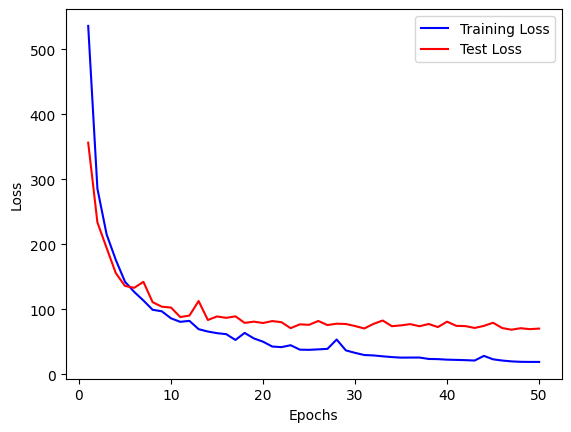

In [30]:
import matplotlib.pyplot as plt

# Obtener la función de pérdida del conjunto de entrenamiento y del conjunto de prueba
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Crear una lista de epochs
epochs = range(1, num_epochs + 1)

# Graficar la evolución de la función de pérdida
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, test_loss, 'r-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Al parecer en nuestro caso hay evidencia de underfitting, dado que a medida
#que aumenta la cantidad de epocas, la training loss function es menor que la
#test o validation loss.

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#Ahora hago lo mismo pero tomando en cuenta que quiero poner o definir una forma de detener
#el calculo de la loss function.
model1 = Sequential()
input_shape = (30, 30, 5)
input_layer = Input(shape=input_shape)
model1.add(Conv2D(52, (3, 3), padding='valid', activation='relu', input_shape=(30, 30, 5)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(57, (3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(41, (3, 3), padding='valid', activation='relu'))
model1.add(Flatten())

# Es un problema de regresión, uso 'mean_squared_error' como loss function
model1.add(Dense(685, activation='tanh'))
model1.add(Dropout(0.06))
model1.add(Dense(2))
model1.compile(optimizer='adam', loss='mean_squared_error')  # función loss MSE y optimizador Adam

# Definir el Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='max', verbose=1)

# Definir el Model Checkpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='max', save_best_only=True, verbose=1)

# Entrenar el modelo con Early Stopping y Model Checkpoint
uno = XX_train_nuevo
dos = XX_test_nuevo
history2 = model1.fit(uno, y_train_nuevo, validation_data=(dos, y_test_nuevo), epochs=num_epochs, batch_size=batch_size, callbacks=[early_stopping, checkpoint])

Epoch 1/50
178/178 [==============================] - ETA: 0s - loss: 577.9561
Epoch 1: val_loss improved from -inf to 361.40375, saving model to best_model.h5
178/178 [==============================] - 3s 10ms/step - loss: 577.9561 - val_loss: 361.4037
Epoch 2/50
171/178 [===========================>..] - ETA: 0s - loss: 293.7431
Epoch 2: val_loss did not improve from 361.40375
178/178 [==============================] - 1s 8ms/step - loss: 292.5719 - val_loss: 241.0832
Epoch 3/50
168/178 [===========================>..] - ETA: 0s - loss: 200.7519
Epoch 3: val_loss did not improve from 361.40375
178/178 [==============================] - 1s 7ms/step - loss: 201.9929 - val_loss: 176.5351
Epoch 4/50
173/178 [============================>.] - ETA: 0s - loss: 164.2400
Epoch 4: val_loss did not improve from 361.40375
178/178 [==============================] - 1s 6ms/step - loss: 162.3072 - val_loss: 147.9022
Epoch 5/50
169/178 [===========================>..] - ETA: 0s - loss: 137.2949
Epoc

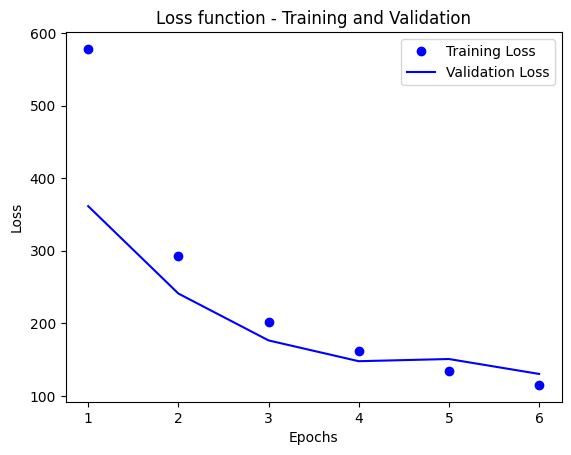

In [32]:
import matplotlib.pyplot as plt

# Obtener los valores de la pérdida del historial
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Crear el gráfico
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss function - Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
#Parte 6

In [49]:
#Ahora queremos obtener los vectores displacement predichos:
predicted_displacements = model1.predict(dos)
predicted_displacements1 = model1.predict(uno)


178/178 [==============================] - 0s 3ms/step


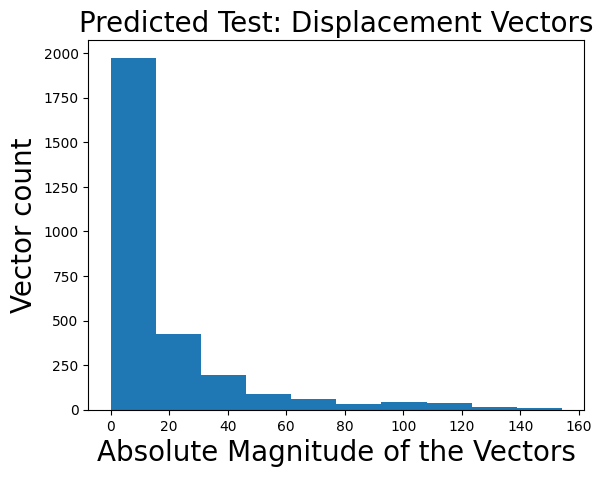

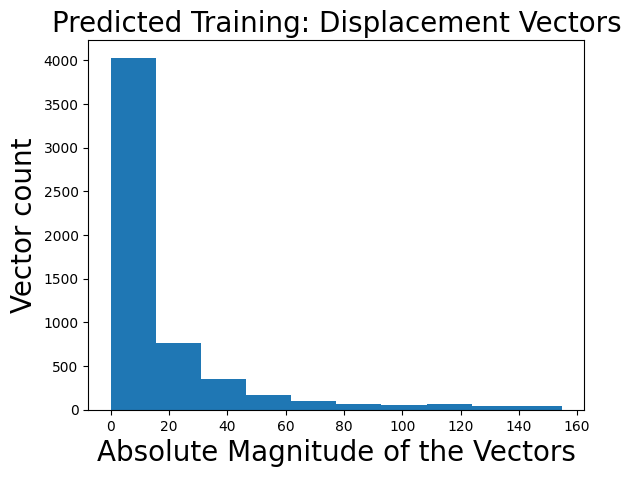

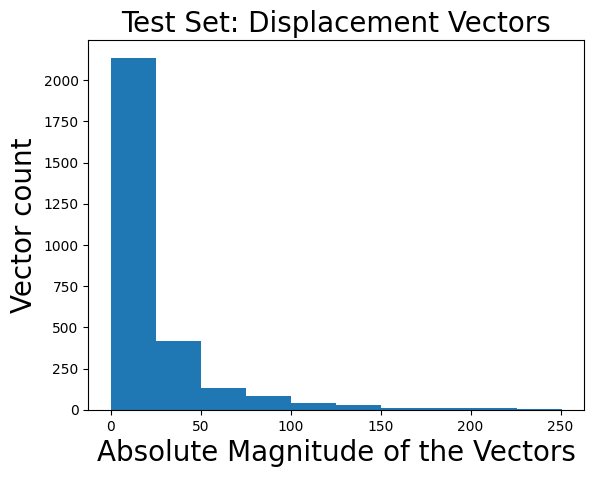

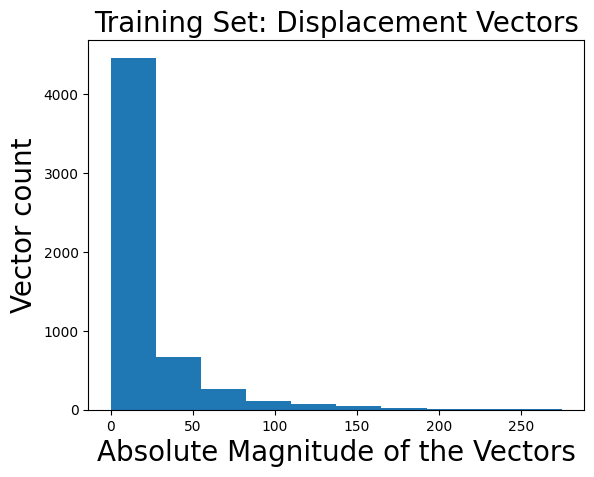

In [50]:
hist_abs(predicted_displacements, 'Predicted Test')
hist_abs(predicted_displacements1, 'Predicted Training')
hist_abs(y_test_nuevo, 'Test Set')
hist_abs(y_train_nuevo, 'Training Set')

imagenes predichas test:


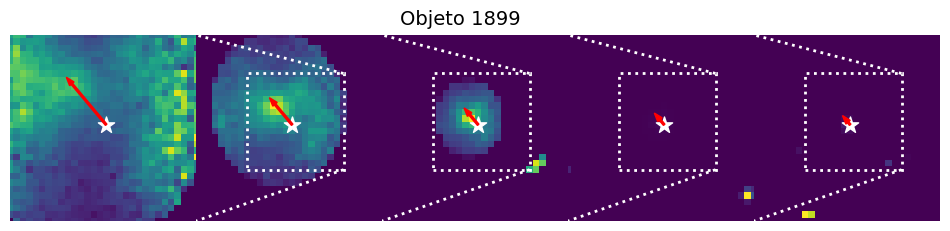

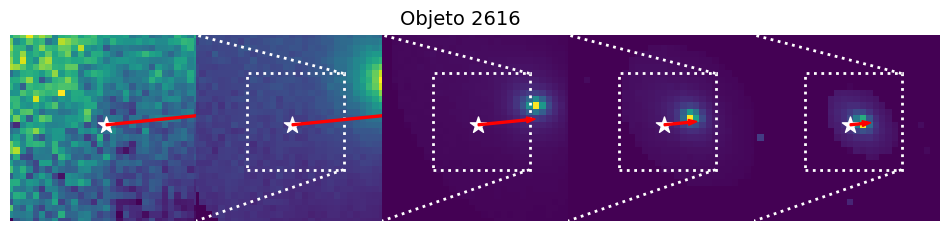

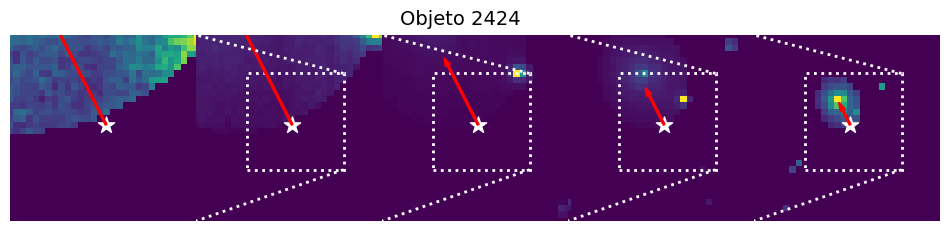

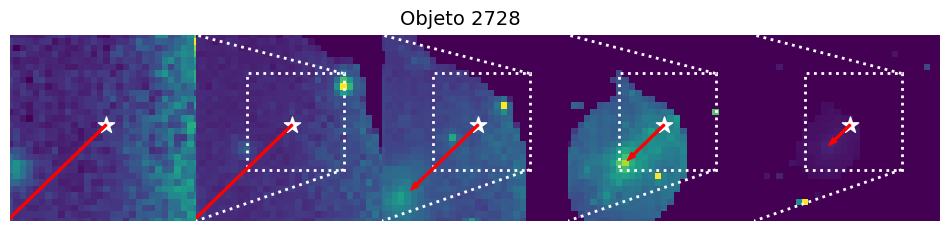

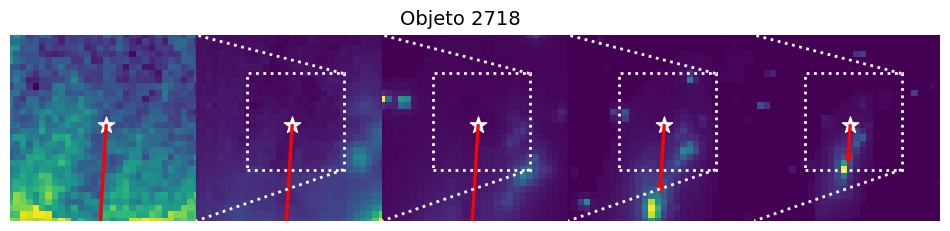

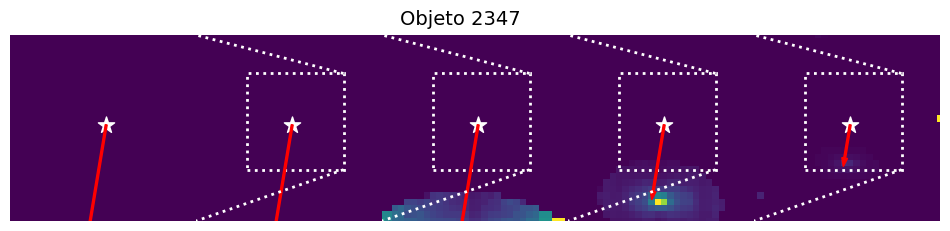

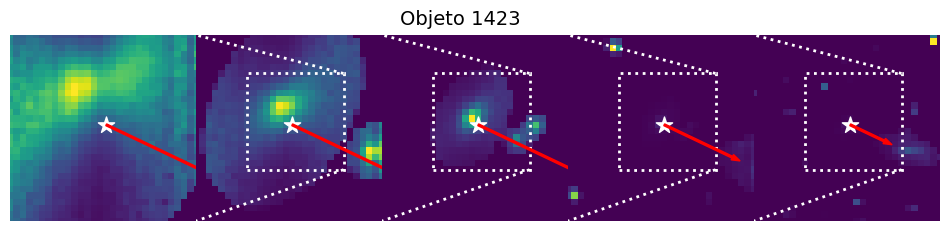

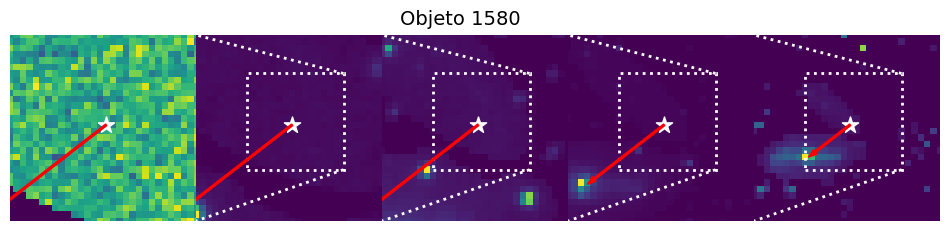

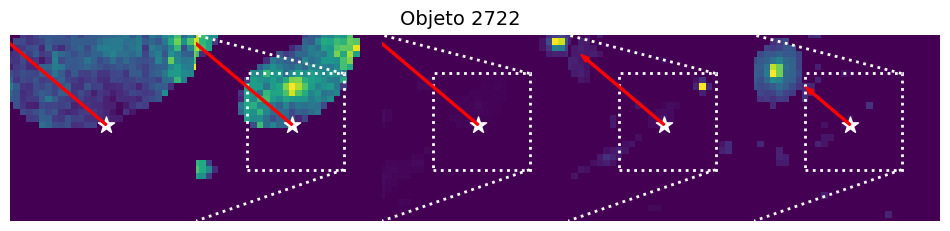

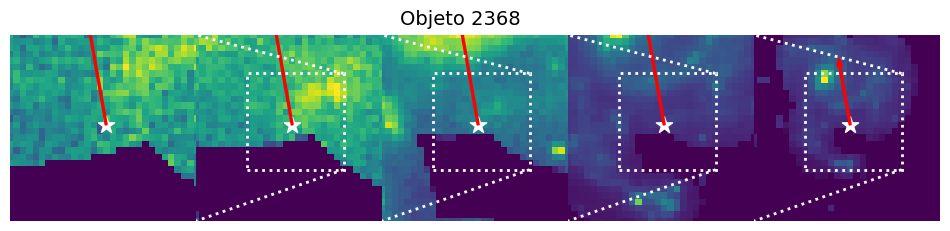

imagenes predichas test:


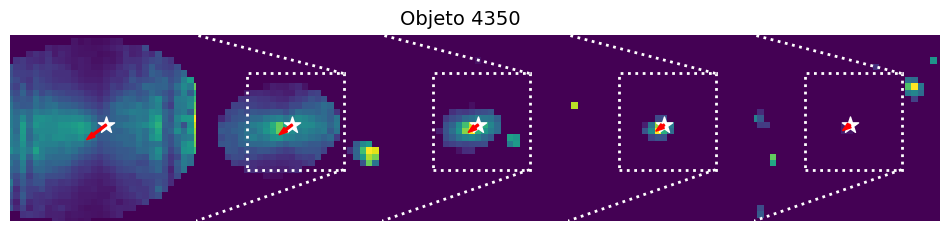

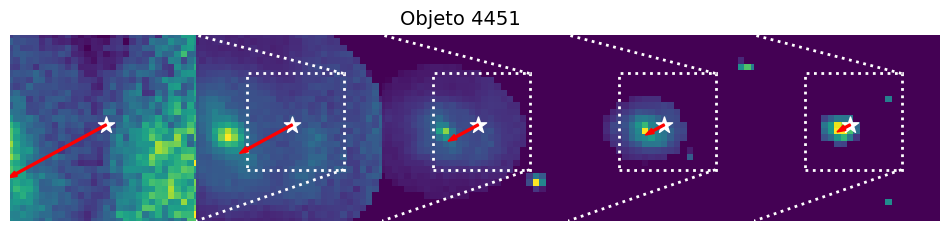

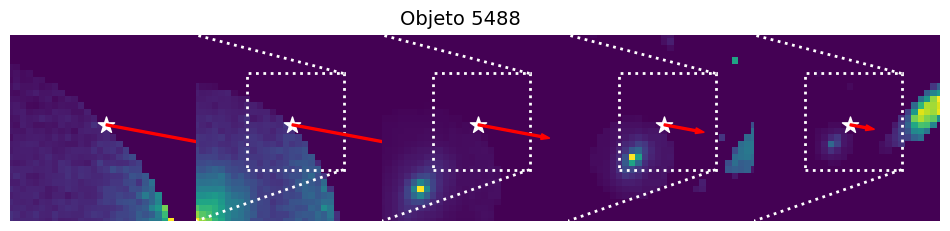

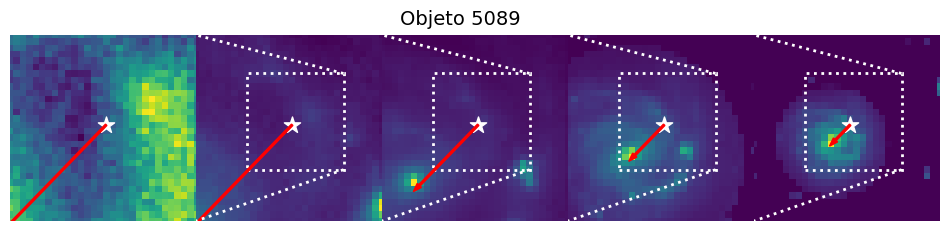

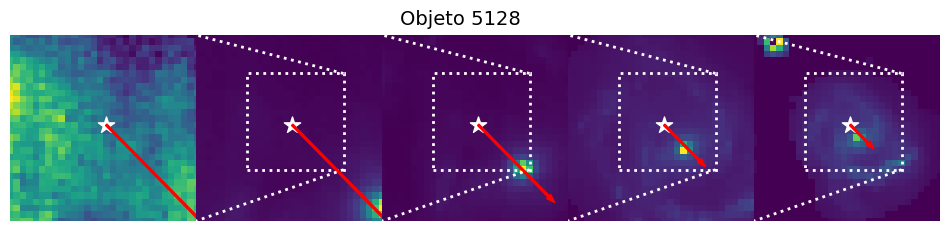

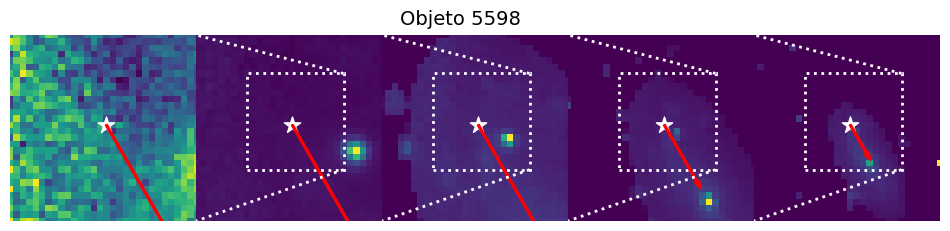

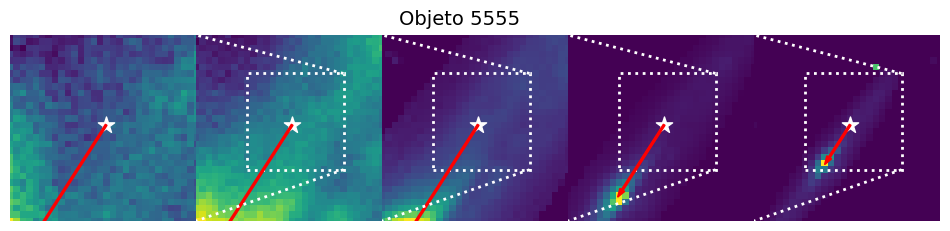

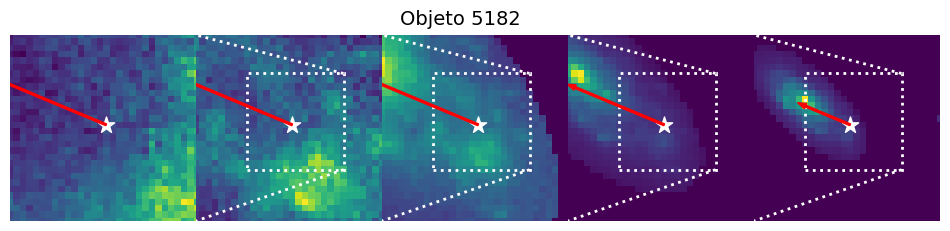

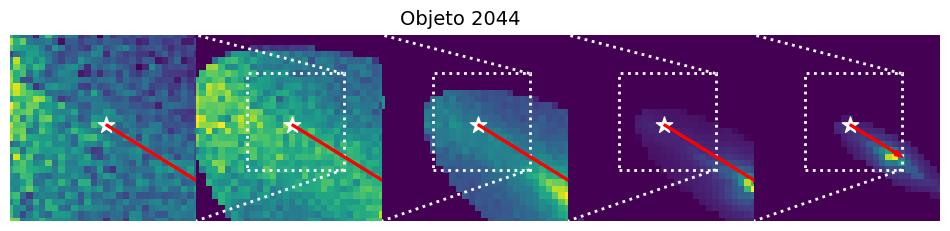

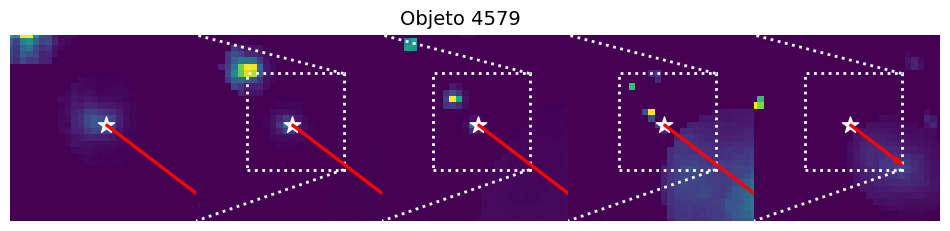

In [51]:
print('imagenes predichas test:')
imagenes_10_bin(X_test_nuevo, predicted_displacements)
print('imagenes predichas test:')
imagenes_10_bin(X_train_nuevo, predicted_displacements1)
